<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Insurance data :- Machine Learning Model_Project 1 (Term 3)

## Problem Statement:- 

- We have a insurance dataset with features like product info, Ins_Age, Ht, Wt, BMI, Employment info, InsuredInfo, Insurance History, Family History, Medical History, Medical Keyword(Dummies) and Response.
- On the basis of above information we need to do data preparation and deployment of efficient model for target variable prediction.
- We need to use model evaluation techniques for model performance comparison in scores and then deployment of best fit model.

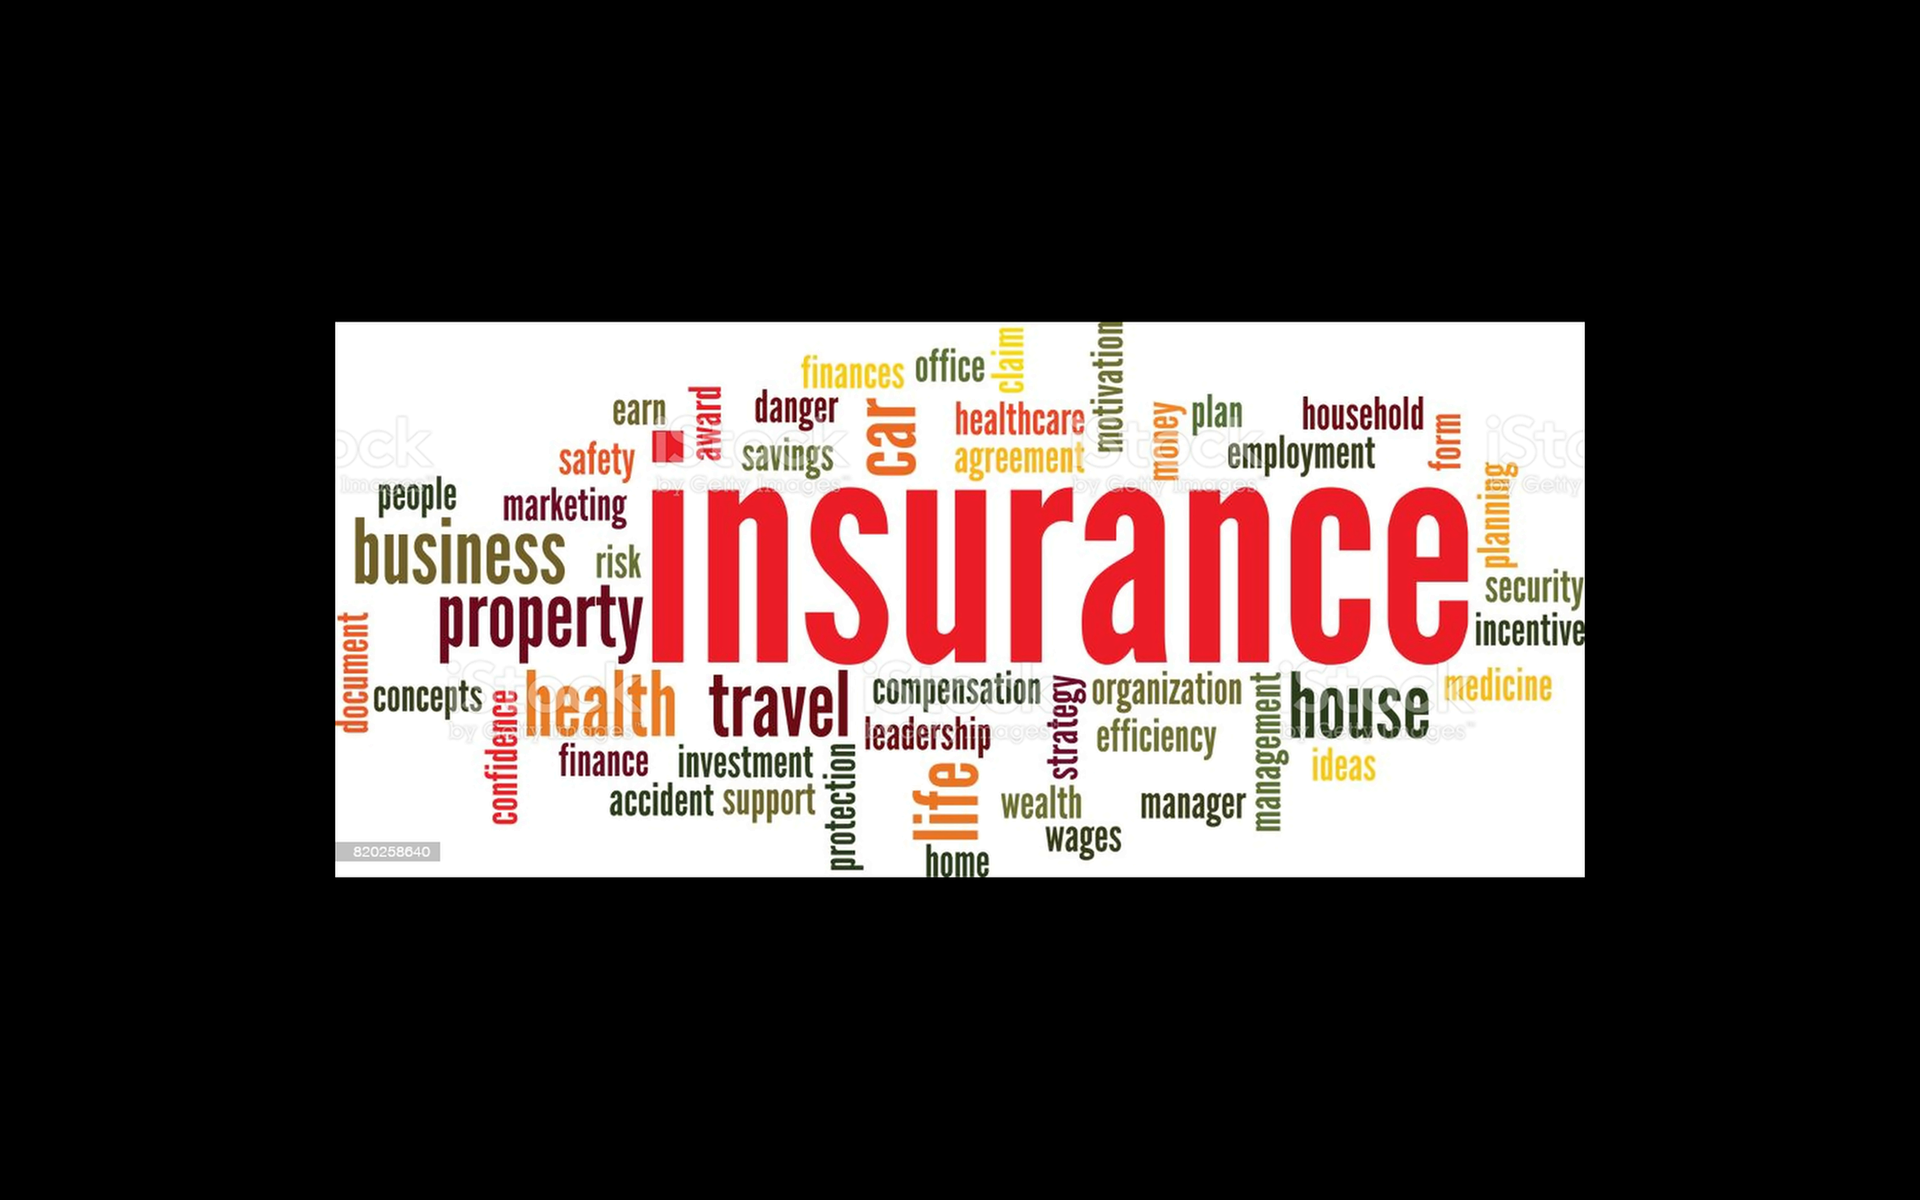

### Importing Module

In [1]:
import numpy as np
np.set_printoptions(precision=4)      # To display values upto Four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.

import seaborn as sns

### Import Insurance Dataset

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv', index_col=0)
data = pd.read_csv('insurance_T3_Project1.csv', index_col=0)
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [3]:
data.info()                  # dataset information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


In [4]:
data.dtypes              # check the data types

Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
Product_Info_5          int64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 127, dtype: object

In [5]:
data.describe()                   # Explains stats in data columns

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


|Records|Features|Dataset Size|Categorical|Dummy Variable|Target Variable|
|:---- | :-----|:----|:---|:----|:---|
|59381|127|20 MB|Yes|Yes|Response 1 to 8|

|Variable|Description|
| :--  |  :---  |
|Id |A unique identifier associated with an application.|
|Product_Info_1-7 | A set of normalized variables relating to the product applied for |
|Ins_Age | Normalized age of applicant |
|Ht | Normalized height of applicant |
|Wt | Normalized weight of applicant |
|BMI | Normalized BMI of applicant |
|Employment_Info_1-6 | A set of normalized variables relating to the employment history of the applicant. |
|InsuredInfo_1-6 | A set of normalized variables providing information about the applicant. |
|Insurance_History_1-9 | A set of normalized variables relating to the insurance history of the applicant. |
|Family_Hist_1-5 | A set of normalized variables relating to the family history of the applicant. |
|Medical_History_1-41 | A set of normalized variables relating to the medical history of the applicant. |
|Medical_Keyword_1-48 | A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.|
|**Response** | **This is the target variable**, an ordinal variable relating to the final decision associated with an application |

***The following variables are all categorical (nominal):***

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41


***The following variables are continuous:***

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5


***The following variables are discrete:***

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

***dummy variables***

Medical_Keyword_1-48 are dummy variables.

### Let's analyse with pandas profiling before data processing

In [7]:
# To output pandas profiling report to an external html file.

#profile = data.profile_report(title='Pandas Profiling before Data Preprocessing')
#profile.to_file(output_file="data_before_preprocessing.html")

### Let's bring together related information in one class.

In [6]:
Product_Info = ['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']
Employment_Info = ['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']
Insured_Info = ['InsuredInfo_1','InsuredInfo_2','InsuredInfo_3','InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7']
Insurance_History = ['Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4','Insurance_History_5','Insurance_History_7','Insurance_History_8','Insurance_History_9']
Family_History = ['Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']

#### We need to fill missing data with median and mode values as below.

In [7]:
data.Employment_Info_4 = data.Employment_Info_4.fillna(data['Employment_Info_4'].median())
data.Employment_Info_6 = data.Employment_Info_6.fillna(data['Employment_Info_6'].median())
data.Insurance_History_5 = data.Insurance_History_5.fillna(data['Insurance_History_5'].median())
data.Family_Hist_2 = data.Family_Hist_2.fillna(data['Family_Hist_2'].median())
data.Family_Hist_3 = data.Family_Hist_3.fillna(data['Family_Hist_3'].median())
data.Family_Hist_4 = data.Family_Hist_4.fillna(data['Family_Hist_4'].median())
data.Family_Hist_5 = data.Family_Hist_5.fillna(data['Family_Hist_5'].median())
data.Medical_History_32 = data.Medical_History_32.fillna(data['Medical_History_32'].mode()[0])

In [8]:
data = data.fillna(0)          # rest of the missing data can be filled with zeroes.

#### Then we are taking a log on information for unique classfied information.

In [9]:
def log():
    print('Product_Info_1:',data['Product_Info_1'].unique())                  # 1-2
    print('Product_Info_2:',data['Product_Info_2'].unique())                  # A1-8, B1-2, C1-4, D1-4, E1
    print('Product_Info_3:',data['Product_Info_3'].unique())                  # 1-34 
    print('Product_Info_4:',data['Product_Info_4'].unique())
    print('Product_Info_5:',data['Product_Info_5'].unique())                  # 2-3
    print('Product_Info_6:',data['Product_Info_6'].unique())                  # 1&3
    print('Product_Info_7:',data['Product_Info_7'].unique())                  # 1-3
    print('Employment_Info_1:',data['Employment_Info_1'].unique())
    print('Employment_Info_2:',data['Employment_Info_2'].unique())
    print('Employment_Info_3:',data['Employment_Info_3'].unique())
    print('Employment_Info_4:',data['Employment_Info_4'].unique())
    print('Employment_Info_5:',data['Employment_Info_5'].unique())
    print('Employment_Info_6:',data['Employment_Info_6'].unique())
    print('InsuredInfo_1:',data['InsuredInfo_1'].unique())
    print('InsuredInfo_2:',data['InsuredInfo_2'].unique())
    print('InsuredInfo_3:',data['InsuredInfo_3'].unique())
    print('InsuredInfo_4:',data['InsuredInfo_4'].unique())
    print('InsuredInfo_5:',data['InsuredInfo_5'].unique())
    print('InsuredInfo_6:',data['InsuredInfo_6'].unique())
    print('InsuredInfo_7:',data['InsuredInfo_7'].unique())
    print('Insurance_History_1:',data['Insurance_History_1'].unique())
    print('Insurance_History_2:',data['Insurance_History_2'].unique())
    print('Insurance_History_3:',data['Insurance_History_3'].unique())
    print('Insurance_History_4:',data['Insurance_History_4'].unique())
    print('Insurance_History_5:',data['Insurance_History_5'].unique())
    print('Insurance_History_7:',data['Insurance_History_7'].unique())
    print('Insurance_History_8:',data['Insurance_History_8'].unique())
    print('Insurance_History_9:',data['Insurance_History_9'].unique())
    print('Family_History_1:',data['Family_Hist_1'].unique())
    print('Family_History_2:',data['Family_Hist_2'].unique())
    print('Family_History_3:',data['Family_Hist_3'].unique())
    print('Family_History_4:',data['Family_Hist_4'].unique())
    print('Family_History_5:',data['Family_Hist_5'].unique())
    print('Ins_Age:',data['Ins_Age'].unique())
    print('Height:',data['Ht'].unique())
    print('Weight:',data['Wt'].unique())
    print('Body Mass Index:',data['BMI'].unique())
    print('Response:',data['Response'].unique())                           # Target Variable  1-8

log()   

Product_Info_1: [1 2]
Product_Info_2: ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']
Product_Info_3: [10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3 18  2 22 17
 38 19 34 12 24 20  1 16  5 27]
Product_Info_4: [0.0769 0.4872 0.2308 ... 0.1099 0.7539 0.1002]
Product_Info_5: [2 3]
Product_Info_6: [1 3]
Product_Info_7: [1 3 2]
Employment_Info_1: [0.028  0.     0.03   ... 0.0514 0.0244 0.139 ]
Employment_Info_2: [12  1  9 15  3 14 20 32 11 10 36 16 37 22  6 26 27 13  2  4 35  7 38 30
 18 29 19 31 21 23 34 25 33  5 28 17]
Employment_Info_3: [1 3]
Employment_Info_4: [0.0000e+00 1.0000e-02 7.2000e-02 1.0000e-03 2.5000e-02 2.5000e-03
 8.0000e-02 1.5000e-01 4.0000e-02 4.0000e-03 1.8000e-02 3.4603e-02
 3.0000e-03 5.0000e-03 4.5000e-02 1.3200e-02 2.3000e-02 1.0000e-01
 4.8000e-02 6.5000e-02 1.5000e-02 4.5000e-03 2.1000e-02 7.0000e-02
 7.2500e-04 2.0000e-03 6.0000e-02 3.0000e-02 5.0000e-04 3.6000e-02
 2.0000e-02 2.4000e-01 5.1000e-02 1

In [10]:
data['Medical_History_12'].unique()  #1-3   

array([2, 3, 1], dtype=int64)

In [11]:
data['Medical_History_32'].unique()   #

array([  0.,  37.,   5.,   2.,   1., 140., 157.,   3.,   6.,  13.,  16.,
        54.,  21., 156.,  11.,  52., 240.,  51., 115.,  12.,  15.,  26.,
         4.,  43.,   9.,  14.,  28.,  31., 119.,  42., 132.,  25., 110.,
        29.,   7.,  68.,   8.,  45.,  27.,  83.,  96.,  18.,  20., 219.,
        23., 135.,  76.,  34.,  24.,  10., 227.,  66., 177., 174., 109.,
       133., 181., 111.,  87., 145.,  22.,  94., 158., 218.,  48.,  80.,
        56.,  36.,  59.,  82., 166.,  91.,  30.,  17., 100., 102.,  58.,
       105.,  44., 101.,  50.,  97.,  70., 112.,  57.,  19., 113., 184.,
        47.,  40., 128.,  62., 141., 170.,  35.])

## Let's create model for given insurance dataset.

#### We will create model as:
- **Regression Model** 
 - Linear Regression (LR)
- **Classfication Model**
 - Logistic Regression (LR)
 - Decision Tree (DT)
 - Random Forest (RF)

## Model 1 :- Linear Regression (LR)

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  
The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

In [12]:
from sklearn.model_selection import train_test_split                # Let's split the dataset using train_test_split

def split1(X1,y1):
    return train_test_split(X1, y1, test_size=0.20, random_state=1)

In [13]:
def linear_reg1( X1, y1, gridsearch = False):                    # Let's use linear_reg1 for 
    
    X1_train, X1_test, y1_train, y1_test = split1(X1,y1)
    
    from sklearn.linear_model import LinearRegression
    linreg1 = LinearRegression()
    
    if not(gridsearch):
        linreg1.fit(X1_train, y1_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg1 = GridSearchCV(linreg1,parameters, cv = 10,refit = True)
        linreg1.fit(X1_train, y1_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg1.best_score_)  
        
        y1_pred_test = linreg1.predict(X1_test)                                                   # make predictions on the testing set

        RMSE_test1 = np.sqrt(mean_squared_error(y1_test, y1_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test1))

    return linreg1

In [14]:
Ins_df_N = pd.DataFrame(data, columns=['Product_Info_4','Ins_Age', 'Ht', 'Wt','BMI','Response'])         # Dataset with columns required
Ins_df_N.head()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Response
Id,,,,,,
2,0.076923,0.641791,0.581818,0.148536,0.323008,8
5,0.076923,0.059701,0.600000,0.131799,0.272288,4
6,0.076923,0.029851,0.745455,0.288703,0.428780,8
7,0.487179,0.164179,0.672727,0.205021,0.352438,8
8,0.230769,0.417910,0.654545,0.234310,0.424046,8


In [15]:
Res_dummies = pd.get_dummies(Ins_df_N.Response, prefix='Res')                           # create eight dummy variables using get_dummies
Res_dummies.head()

,Res_1,Res_2,Res_3,Res_4,Res_5,Res_6,Res_7,Res_8
Id,,,,,,,,
2,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1


In [16]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
Ins_df1 = pd.concat([Ins_df_N, Res_dummies], axis=1)
Ins_df1.head()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Response,Res_1,Res_2,Res_3,Res_4,Res_5,Res_6,Res_7,Res_8
Id,,,,,,,,,,,,,,
2,0.076923,0.641791,0.581818,0.148536,0.323008,8,0,0,0,0,0,0,0,1
5,0.076923,0.059701,0.600000,0.131799,0.272288,4,0,0,0,1,0,0,0,0
6,0.076923,0.029851,0.745455,0.288703,0.428780,8,0,0,0,0,0,0,0,1
7,0.487179,0.164179,0.672727,0.205021,0.352438,8,0,0,0,0,0,0,0,1
8,0.230769,0.417910,0.654545,0.234310,0.424046,8,0,0,0,0,0,0,0,1


In [17]:
feature_cols1 = ['Product_Info_4','Ins_Age', 'Ht', 'Wt','BMI','Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']             # create a Python list of feature names
X1 = Ins_df1[feature_cols1]  
y1 = Ins_df1.Response
linreg1 = linear_reg1(X1,y1)                             

In [18]:
feature_cols1.insert(0,'Intercept')            # Let's interpret the intercept and model coefficients.
coef1 = linreg1.coef_.tolist()
coef1.insert(0, linreg1.intercept_)

eq1 = zip(feature_cols1, coef1)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 3.926215601241034
Product_Info_4 -9.083846850651328e-16
Ins_Age -7.012273447973644e-15
Ht -3.814661007522702e-15
Wt -3.792825792160734e-15
BMI -2.3135967215419905e-15
Res_1 -2.926215601241024
Res_2 -1.9262156012410283
Res_3 -0.9262156012410323
Res_4 0.07378439875897382
Res_5 1.0737843987589732
Res_6 2.073784398758978
Res_7 3.073784398758975
Res_8 4.073784398758972


#### Let's try linear regression (LR) using another data preparation with standard scaler.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Ins_df_N)
data1 = scaler.transform(Ins_df_N)

In [20]:
Ins_df2 = pd.DataFrame(data1)
Ins_df2.head()

,0,1,2,3,4,5
0,-0.891949,1.197962,-1.690031,-1.617886,-1.198363,0.961882
1,-0.891949,-1.753982,-1.445119,-1.805858,-1.613382,-0.666244
2,-0.891949,-1.905363,0.514174,-0.043622,-0.332879,0.961882
3,0.559979,-1.224146,-0.465473,-0.983481,-0.957553,0.961882
4,-0.347476,0.062599,-0.710384,-0.654530,-0.371621,0.961882


In [21]:
Ins_df2.columns = ['Product_Info_4','Ins_Age', 'Ht', 'Wt','BMI','Response']
Ins_df2.head()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Response
0,-0.891949,1.197962,-1.690031,-1.617886,-1.198363,0.961882
1,-0.891949,-1.753982,-1.445119,-1.805858,-1.613382,-0.666244
2,-0.891949,-1.905363,0.514174,-0.043622,-0.332879,0.961882
3,0.559979,-1.224146,-0.465473,-0.983481,-0.957553,0.961882
4,-0.347476,0.062599,-0.710384,-0.654530,-0.371621,0.961882


In [22]:
feature_cols2 = ['Product_Info_4','Ins_Age', 'Ht', 'Wt','BMI']                # create a Python list of feature names
X2 = Ins_df2[feature_cols2]                                     # use the list to select a subset of the original DataFrame-+

In [23]:
print(type(X2))
print(X2.shape)

<class 'pandas.core.frame.DataFrame'>
(59381, 5)


In [24]:
y2 = Ins_df2.Response
y2.head()

0    0.961882
1   -0.666244
2    0.961882
3    0.961882
4    0.961882
Name: Response, dtype: float64

In [25]:
print(type(y2))
print(y2.shape)

<class 'pandas.core.series.Series'>
(59381,)


In [26]:
from sklearn.model_selection import train_test_split              # train_test_split for another dataset

def split2(X2,y2):
    return train_test_split(X2, y2, test_size=0.20, random_state=1)

In [27]:
X2_train, X2_test, y2_train, y2_test=split2(X2,y2)
print('Train cases as below')
print('X2_train shape: ',X2_train.shape)
print('y2_train shape: ',y2_train.shape)
print('\nTest cases as below')
print('X2_test shape: ',X2_test.shape)
print('y2_test shape: ',y2_test.shape)

Train cases as below
X2_train shape:  (47504, 5)
y2_train shape:  (47504,)

Test cases as below
X2_test shape:  (11877, 5)
y2_test shape:  (11877,)


In [28]:
def linear_reg2( X2, y2, gridsearch = False):                    # linear_reg2 for another dataset
    
    X2_train, X2_test, y2_train, y2_test = split2(X2,y2)
    
    from sklearn.linear_model import LinearRegression
    linreg2 = LinearRegression()
    
    if not(gridsearch):
        linreg2.fit(X2_train, y2_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg2 = GridSearchCV(linreg2,parameters, cv = 10,refit = True)
        linreg2.fit(X2_train, y2_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg2.best_score_)  
        
        y2_pred_test = linreg2.predict(X2_test)                                                   # make predictions on the testing set

        RMSE_test2 = np.sqrt(mean_squared_error(y2_test, y2_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test2))

    return linreg2

In [29]:
linreg2 = linear_reg2(X2,y2)

In [30]:
print('Intercept:',linreg2.intercept_)          # print the intercept and coefficient
print('Coefficients:',linreg2.coef_) 

Intercept: 0.0018601425929590213
Coefficients: [ 0.136  -0.1258  0.0104 -0.1628 -0.2076]


In [31]:
feature_cols2.insert(0,'Intercept')
coef2 = linreg2.coef_.tolist()            
coef2.insert(0, linreg2.intercept_)  

In [32]:
eq2 = zip(feature_cols2, coef2)

for c1,c2 in eq2:
    print(c1,c2)

Intercept 0.0018601425929590213
Product_Info_4 0.1359685798354299
Ins_Age -0.12576604305102268
Ht 0.010439309797096652
Wt -0.16278495030942186
BMI -0.2076331948039257


#### Let's predict with linreg2.predict for train and test data

In [33]:
y2_pred_train = linreg2.predict(X2_train)  

In [34]:
y2_pred_test = linreg2.predict(X2_test)      

#### Let's find the error metrics (MAE, MSE and RMSE)

In [13]:
from sklearn.metrics.regression import mean_squared_error, mean_absolute_error 

#### Mean Squared Error (MSE)

In [36]:
MSE_train2 = mean_squared_error(y2_train, y2_pred_train)
MSE_test2 = mean_squared_error(y2_test, y2_pred_test)

In [37]:
print('MSE for training set is {}'.format(MSE_train2))
print('MSE for test set is {}'.format(MSE_test2))

MSE for training set is 0.8084192330608296
MSE for test set is 0.8163641339656305


#### Root Mean Squared Error (RMSE)

In [38]:
RMSE_train2 = np.sqrt(mean_squared_error(y2_train, y2_pred_train))
RMSE_test2 = np.sqrt(mean_squared_error(y2_test, y2_pred_test))

In [39]:
print('RMSE for training set is {}'.format(RMSE_train2))
print('RMSE for test set is {}'.format(RMSE_test2))

RMSE for training set is 0.8991213672585195
RMSE for test set is 0.9035287123083751


#### Mean Absolute Error (MAE)

In [40]:
MAE_train2 = mean_absolute_error(y2_train, y2_pred_train)
MAE_test2 = mean_absolute_error(y2_test, y2_pred_test)

In [41]:
print('MAE for training set is {}'.format(MAE_train2))
print('MAE for test set is {}'.format(MAE_test2))

MAE for training set is 0.7287250933062382
MAE for test set is 0.7347611129354008


#### R-Squared and Adjusted R-Squared

In [42]:
yhat2 = linreg2.predict(X2_train)
SS_Residual = sum((y2_train-yhat2)**2)
SS_Total = sum((y2_train-np.mean(y2_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.18943600915209102 0.18935068303406


#### Best estimator and RMSE score for Test data

In [43]:
linreg2=linear_reg2(X2,y2,gridsearch=True)

Mean cross-validated score of the best_estimator :  0.1891155750291229
RMSE for the test set is 0.9035287123083751


### Let's do the Label Encoding for Product_Info_2

In [14]:
data_cut = data[['Product_Info_2']]                     # select column

In [15]:
data_cha = data.drop(['Product_Info_2'], axis=1)          # drop the column from data

In [16]:
def log(data_cut):                                        # Use label Encoder for Product_Info_2 column in data_cut
    from sklearn.preprocessing import LabelEncoder
    return data_cut.apply(LabelEncoder().fit_transform)

data_cut = log(data_cut)

In [17]:
Ins_df3 = pd.concat([data_cha, data_cut], axis=1)
Ins_df3.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2
Id,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,8,16
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,4,0
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,8,18
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,8,17
8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,8,15


## Let's do Exploratory data analysis (EDA) on Insurance Dataset.

Text(0.5, 1.0, 'Pair Plot')

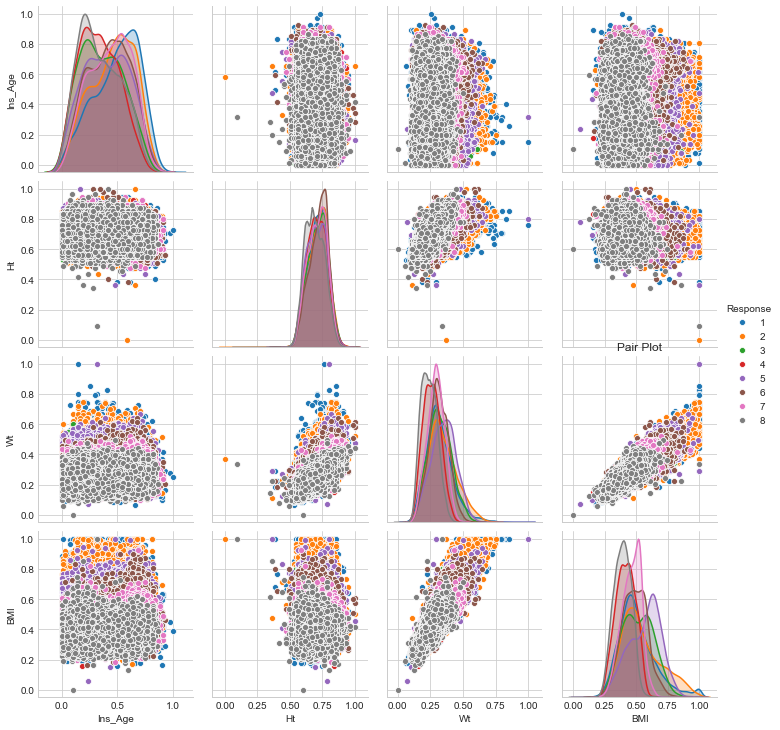

In [48]:
sns.pairplot(Ins_df1[["Ins_Age","Ht","Wt","BMI","Response"]],vars = ["Ins_Age","Ht","Wt","BMI"],hue="Response", dropna=True)
plt.title('Pair Plot')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

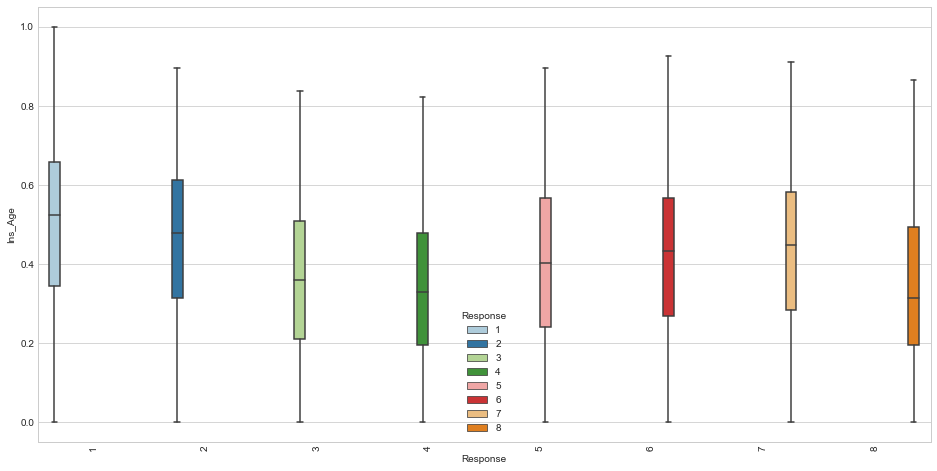

In [49]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=Ins_df1, x='Response', y='Ins_Age', hue='Response', showfliers=False, palette='Paired', width=0.8)
plt.xticks(rotation=90)

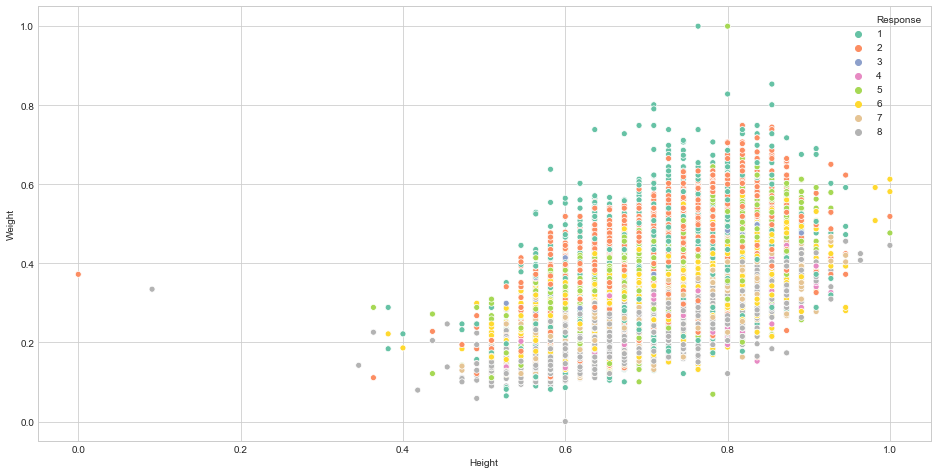

In [50]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=Ins_df1, x=Ins_df1['Ht'], y=Ins_df1['Wt'], hue='Response', palette='Set2')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

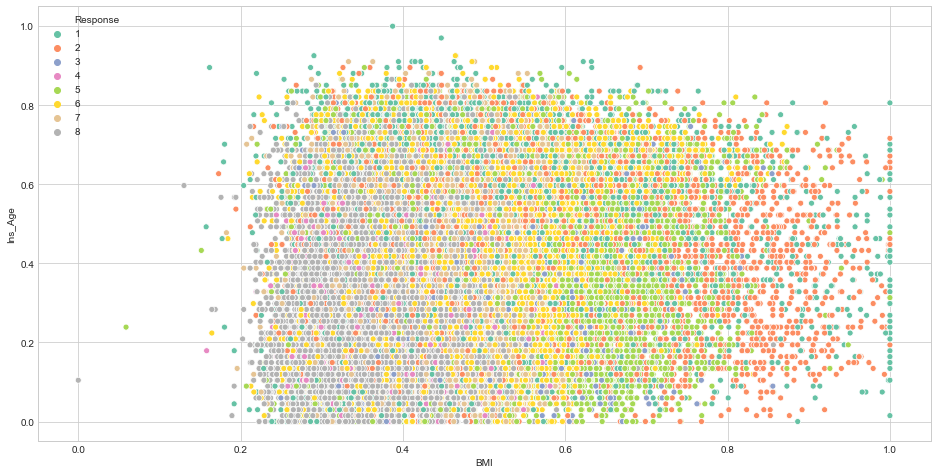

In [51]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=Ins_df1, x=Ins_df1['BMI'], y=Ins_df1['Ins_Age'], hue='Response', palette='Set2')
plt.show()

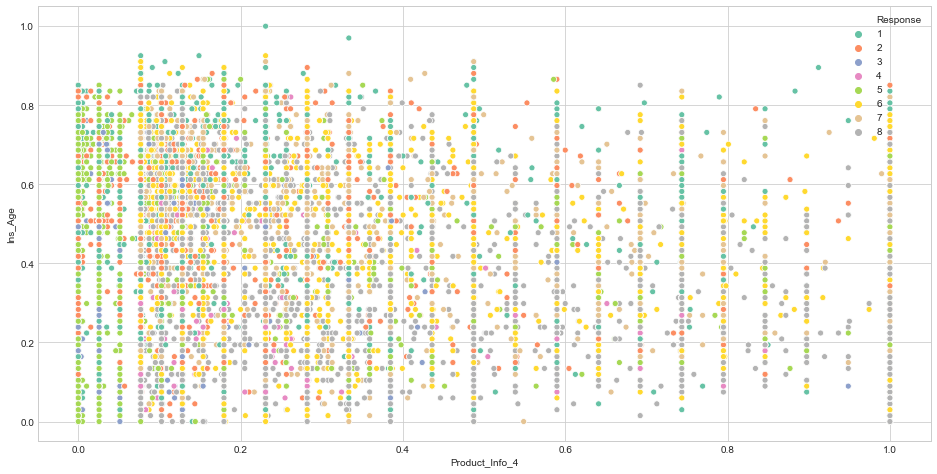

In [52]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=Ins_df1, x=Ins_df1['Product_Info_4'], y=Ins_df1['Ins_Age'], hue='Response', palette='Set2')
plt.show()

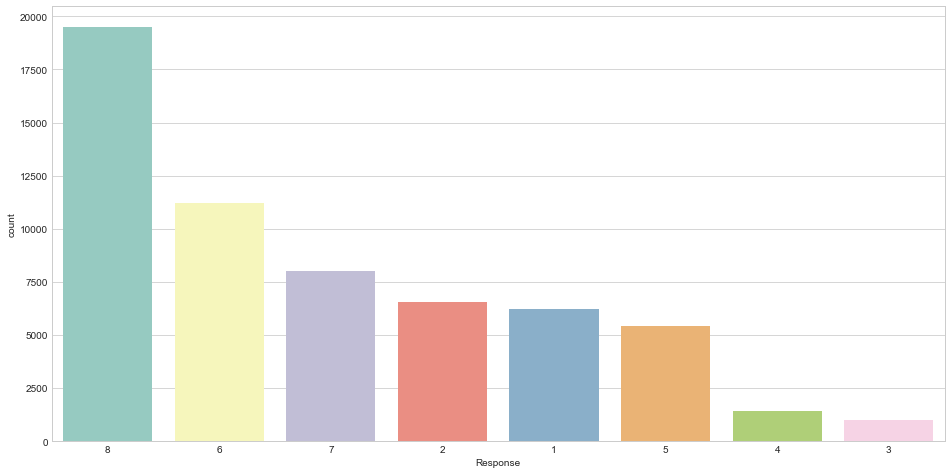

In [53]:
plt.figure(figsize=(16,8))
sns.countplot('Response',data = Ins_df1, order = Ins_df1['Response'].value_counts().index, palette="Set3")          
#plt.title("Counts",fontsize=18,fontweight="bold")
plt.show()

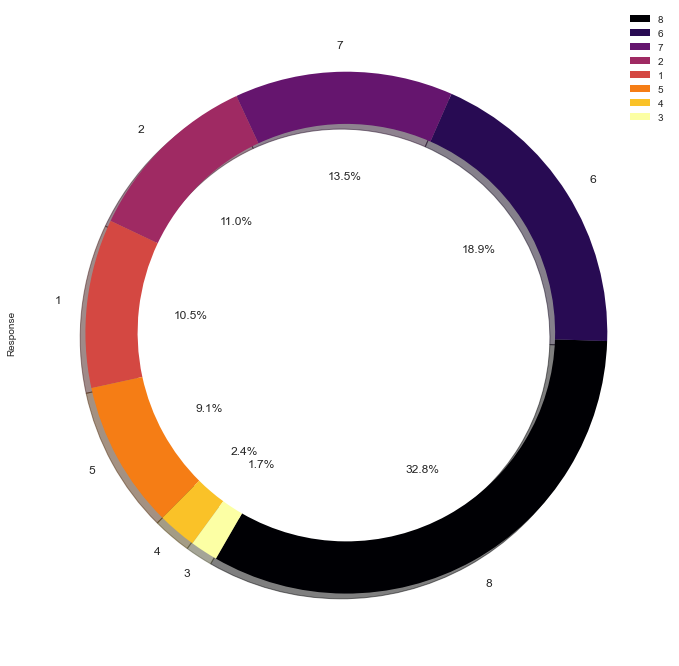

In [54]:
space = np.ones(8) / 7
Ins_df1['Response'].value_counts().plot(kind='pie', fontsize=12, wedgeprops=dict(width=0.2), autopct='%3.1f%%',
                                            shadow=True, startangle=240, legend=True, figsize=(20,12), cmap='inferno')

#plt.title('Donut Plot showing the proportion of each response value')

### Let's analyse with pandas profiling after data processing

In [25]:
# To output pandas profiling report to an external html file.

#profile_new = Ins_df.profile_report(title='Pandas Profiling after Data Preprocessing')
#profile_new.to_file(output_file="Ins_df_after_preprocessing.html")

In [18]:
Ins_df3 = Ins_df3.reset_index()                  # reset index of data
Ins_df3.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,8,16
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,4,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,8,18
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,8,17
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,8,15


#### Let's drop few columns from data

In [19]:
Ins_df3 = Ins_df3.drop(['Id','Product_Info_4','Employment_Info_1','Employment_Info_4','Employment_Info_6' ,'Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Ins_Age','Ht','Wt','BMI'], axis=1)
Ins_df3.head()                           

,Product_Info_1,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2
0,1,10,2,1,1,12,1,3,1,2,...,0,0,0,0,0,0,0,0,8,16
1,1,26,2,3,1,1,3,2,1,2,...,0,0,0,0,0,0,0,0,4,0
2,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,8,18
3,1,10,2,3,1,9,1,3,2,2,...,0,0,0,0,0,0,0,0,8,17
4,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,8,15


In [20]:
Ins_df3['Product_Info_2'].unique()                   # unique values in Product_Info_2

array([16,  0, 18, 17, 15,  7,  1, 14,  6,  5,  2,  4, 13, 10,  9, 12, 11,
        3,  8])

In [21]:
Ins_df3.fillna(0)                                 # fill missing values with zeroes
Ins_df3.head()

,Product_Info_1,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2
0,1,10,2,1,1,12,1,3,1,2,...,0,0,0,0,0,0,0,0,8,16
1,1,26,2,3,1,1,3,2,1,2,...,0,0,0,0,0,0,0,0,4,0
2,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,8,18
3,1,10,2,3,1,9,1,3,2,2,...,0,0,0,0,0,0,0,0,8,17
4,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,8,15


In [91]:
#Ins_df3.to_csv('Insurance_df3.csv')         # Export file in csv format

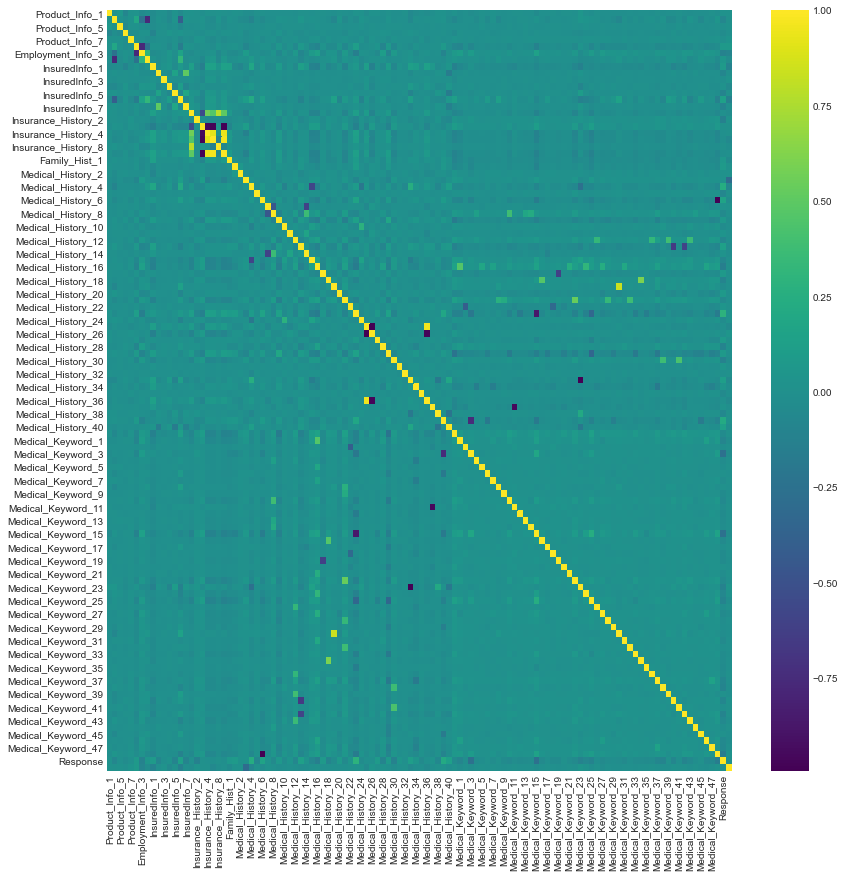

In [65]:
corr_ins = Ins_df3.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_ins, annot=False, cmap='viridis')

#### Let's create X and y data before train_test_split

In [22]:
#X = Ins_df.loc[:,"Medical_Keyword_1":"Medical_Keyword_48"]   # All  other columns excluding target variable (TV)
X = Ins_df3.loc[:, Ins_df3.columns != 'Response']                  
X.head()

,Product_Info_1,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2
0,1,10,2,1,1,12,1,3,1,2,...,0,0,0,0,0,0,0,0,0,16
1,1,26,2,3,1,1,3,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,0,18
3,1,10,2,3,1,9,1,3,2,2,...,0,0,0,0,0,0,0,0,0,17
4,1,26,2,3,1,9,1,2,1,2,...,0,0,0,0,0,0,0,0,0,15


In [23]:
y = Ins_df3.Response             # Target variable

#### Spliting dataset with train_test_split

In [24]:
#from sklearn.cross_validation import train_test_split   # cross_validation is deprecated and included in model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [25]:
print(X_train.shape)
print(y_train.shape)

(47504, 113)
(47504,)


## Model 2 :- Logistic Regression (LR)

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifying__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known.

Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred_trainlr = logreg.predict(X_train)     # Predict y variable for train data

In [65]:
y_pred_testlr = logreg.predict(X_test)        # Predict y variable for test data

#### Accuracy score for Logistic Regression (LR)

In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testlr))

Accuracy score for test data is: 0.3488254609749937


In [67]:
predslr1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.40,1,0)            # setting threshold to .25
print('Accuracy score for test data is:', accuracy_score(y_test,predslr1))

Accuracy score for test data is: 0.0


In [68]:
preds_lr2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)          # setting threshold to .75
print('Accuracy score for test data is:', accuracy_score(y_test,preds_lr2))

Accuracy score for test data is: 0.0


#### Confusion Matrix for Logistic Regression (LR)

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrixlr = pd.DataFrame(confusion_matrix(y_test, y_pred_testlr))

In [70]:
confusion_matrixlr.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixlr.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
print(confusion_matrixlr)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    228      0      0      0      0    236      1    815
Res_2    163      1      0      0      0    263      6    893
Res_3      9      0      0      0      0     11      0    174
Res_4      8      0      0      0      0     19      0    256
Res_5     87      0      0      0      0    131      3    901
Res_6    140      0      0      0      0    374      0   1692
Res_7    111      0      0      0      0    233      0   1264
Res_8     86      0      0      0      2    225      5   3540


#### Precision, Recall and F1 Score for Logistic Regression (LR)

In [71]:
from sklearn.metrics import precision_score
precision2 = precision_score(y_test,y_pred_testlr,average='weighted')
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model2 is: 0.3083340396321796


In [72]:
from sklearn.metrics import recall_score
print('Recall score for test data using model2 is:',recall_score(y_test,y_pred_testlr,average='weighted')) 

Recall score for test data using model2 is: 0.3488254609749937


In [73]:
from sklearn.metrics import f1_score
print('F1_score for test data using model2 is:',f1_score(y_test, y_pred_testlr,average='weighted'))

F1_score for test data using model2 is: 0.23272243998211894


## Model 3 :- Decision Tree Classification (DT)

A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks.__<br/>
The intuition behind the decision tree algorithm is simple, yet also very powerful.<br/>

- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.<br/>
- It is a very natural decision making process asking a series of question in a nested if then else statement.
- On each node you ask a question to further split the data held by the node. <br/>

In [74]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier( criterion='gini')
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred_trainD = model3.predict(X_train)                 # Predict y variable for train data

In [76]:
y_pred_testD = model3.predict(X_test)                  # Predict y variable for test data

#### Accuracy score for Decision Tree Classification (DT)

In [77]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testD))

Accuracy score for test data is: 0.3229771827902669


#### Confusion Matrix for Decision Tree Classification (DT)

In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrixD = pd.DataFrame(confusion_matrix(y_test, y_pred_testD))

confusion_matrixD.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixD.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']

print(confusion_matrixD)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    262    234     29     23    118    271    169    174
Res_2    219    276     30     31    130    251    156    233
Res_3     29     26     41     30     11     35     10     12
Res_4     38     29     27     75     21     55     10     28
Res_5    139    134     12     12    160    228    160    277
Res_6    228    261     45     57    187    675    281    472
Res_7    130    158      9      6    145    306    348    506
Res_8    217    261     15     33    264    514    555   1999


#### Precision, Recall and F1 score for Decision Tree Classification (DT)

In [79]:
from sklearn.metrics import precision_score
precision3 = precision_score(y_test,y_pred_testD,average='weighted')
print('Precision score for test data using model3 is:', precision3)

Precision score for test data using model3 is: 0.32625789227978164


In [80]:
from sklearn.metrics import recall_score
print('Recall score for test data using model3 is:',recall_score(y_test,y_pred_testD,average='weighted')) 

Recall score for test data using model3 is: 0.3229771827902669


In [97]:
from sklearn.metrics import f1_score
print('F1_score for test data using model3 is:',f1_score(y_test, y_pred_testD,average='weighted'))

F1_score for test data using model3 is: 0.3228577903684768


### Decision Tree Classification with GridsearchCV

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [124]:
tree_para

[{'criterion': ['gini', 'entropy'],
  'max_depth': range(2, 60),
  'max_features': ['sqrt', 'log2', None]}]

#### Import required module for plotting decision tree

## Model 4 :- Random Forest Classification (RF)

__Random Forest__ is considered to be the __panacea__ of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

In Random Forest, we grow __multiple trees__ as opposed to a single tree in CART model . To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. __The forest chooses the classification having the most votes__ (over all the trees in the forest) and in case of __regression__, it takes the __average of outputs by different trees.__

Random Forest is a versatile machine learning method capable of performing __both regression and classification tasks__. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of __ensemble learning__ method, where __a group of weak models combine to form a powerful model.__

The random forest combines hundreds or __thousands of decision trees__, trains each one on a __slightly different set of the observations__ (sampling the data points with replacement) and also __splits nodes in each tree considering only a limited number of the features.__ The final predictions made by the random forest are made by __averaging the predictions of each individual tree.__

In [81]:
from sklearn.ensemble import RandomForestClassifier       # RF_model4 with defualt n_estimators

model4 = RandomForestClassifier(random_state = 0)

model4.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [82]:
from sklearn.ensemble import RandomForestClassifier        # RF_model5 with defualt n_estimators=130.

model5 = RandomForestClassifier(random_state = 0,
                                n_estimators = 200,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [83]:
y_pred_trainrf4 = model4.predict(X_train)              # RF_model4 - Predict y variable for train data 
y_pred_trainrf5 = model5.predict(X_train)              # RF_model5 - Predict y variable for train data

In [84]:
y_pred_testrf4 = model4.predict(X_test)             # make predictions on the testing set  for RF_model4 and RF_model5
y_pred_testrf5 = model5.predict(X_test)

#### Accuracy score for Random Forest Classification (RF)

In [85]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_testrf4))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_testrf5))

Accuracy score for test data using the model without parameter specification: 0.45272375178917235
Accuracy score for test data using the model with parameter specification: 0.45625999831607306


#### Confusion Matrix for Random Forest Classification (RF)

In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrixrf4 = pd.DataFrame(confusion_matrix(y_test, y_pred_testrf4))

confusion_matrixrf4.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixrf4.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
print(confusion_matrixrf4)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    302    185      9     12     28    293    119    332
Res_2    203    234     13     12     29    302    125    408
Res_3     28     15     17     38      5     71      5     15
Res_4     19      8     11     75      2    125      6     37
Res_5     69     76      0      4     75    273    132    493
Res_6    120    132      8     16     27    955    211    737
Res_7     63     59      3      1     19    250    379    834
Res_8     51     36      0      3     38    241    149   3340


In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrixrf5 = pd.DataFrame(confusion_matrix(y_test, y_pred_testrf5))

confusion_matrixrf5.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixrf5.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
print(confusion_matrixrf5)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    305    176      6     11     27    300    123    332
Res_2    182    228     10     17     22    326    134    407
Res_3     28     15     16     39      4     72      7     13
Res_4     17      7      8     77      2    129      5     38
Res_5     66     80      1      4     71    258    134    508
Res_6    112    122      6     19     25    955    215    752
Res_7     58     49      2      1     20    236    389    853
Res_8     41     34      0      3     41    237    124   3378


#### Precision, Recall and F1 Score for Random Forest Classification (RF)

In [88]:
from sklearn.metrics import precision_score
precision4 = precision_score(y_test,y_pred_testrf4,average='weighted')
print('Precision score for test data using model4 is:', precision4)
precision5 = precision_score(y_test,y_pred_testrf5,average='weighted')
print('Precision score for test data using model5 is:', precision5)

Precision score for test data using model4 is: 0.4118979746030039
Precision score for test data using model5 is: 0.4159808213064821


In [89]:
from sklearn.metrics import recall_score
print('Recall score for test data using model4 is:',recall_score(y_test,y_pred_testrf4,average='weighted'))   
print('Recall score for test data using model5 is:',recall_score(y_test,y_pred_testrf5,average='weighted'))

Recall score for test data using model4 is: 0.45272375178917235
Recall score for test data using model5 is: 0.45625999831607306


In [90]:
from sklearn.metrics import f1_score
print('F1_score for test data using model4 is:',f1_score(y_test, y_pred_testrf4,average='weighted'))
print('F1_score for test data using model5 is:',f1_score(y_test, y_pred_testrf5,average='weighted'))

F1_score for test data using model4 is: 0.40506248811421564
F1_score for test data using model5 is: 0.40683067096391956


# Conclusion:-

Now we have created models; and with available score (Accuracy, Precision, Recall, F1 score) it's cleared that we will prefer deployment of Random Forest Classfier Model i.e. RF_Model4 or RF_model5.

# Thanks!!!

In [98]:
from sklearn.ensemble import RandomForestClassifier        # RF_model5 with defualt n_estimators=50.

model7 = RandomForestClassifier(random_state = 0,
                                n_estimators = 60,
                                min_samples_split = 20,
                                min_samples_leaf = 5)

model7.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=20,
                       n_estimators=60, random_state=0)

In [113]:
from sklearn.ensemble import RandomForestClassifier        # RF_model5 with defualt n_estimators=100.

model8 = RandomForestClassifier(random_state = 0,
                                n_estimators = 70,
                                min_samples_split = 20,
                                min_samples_leaf = 5)

model8.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=20,
                       n_estimators=70, random_state=0)

In [114]:
y_pred_trainrf7 = model7.predict(X_train)              # RF_model7 - Predict y variable for train data 
y_pred_trainrf8 = model8.predict(X_train)              # RF_model8 - Predict y variable for train data

In [115]:
y_pred_testrf7 = model7.predict(X_test)             # make predictions on the testing set  for RF_model4 and RF_model5
y_pred_testrf8 = model8.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_testrf7))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_testrf8))

Accuracy score for test data using the model without parameter specification: 0.46232213521933146
Accuracy score for test data using the model with parameter specification: 0.46265892060284586


In [117]:
from sklearn.metrics import confusion_matrix

confusion_matrixrf7 = pd.DataFrame(confusion_matrix(y_test, y_pred_testrf7))

confusion_matrixrf7.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixrf7.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
print(confusion_matrixrf7)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    274    155      0      9      5    319    136    382
Res_2    150    211      2      8      1    346    142    466
Res_3     21      6      4     30      0    106      6     21
Res_4     15      2      0     61      0    150      5     50
Res_5     71     64      0      2     19    269    132    565
Res_6     95    109      0      6      2    972    190    832
Res_7     50     20      0      3      0    220    383    932
Res_8     16     14      0      0      0    217     44   3567


In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrixrf8 = pd.DataFrame(confusion_matrix(y_test, y_pred_testrf8))

confusion_matrixrf8.index = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
confusion_matrixrf8.columns = ['Res_1','Res_2','Res_3','Res_4','Res_5','Res_6','Res_7','Res_8']
print(confusion_matrixrf8)

       Res_1  Res_2  Res_3  Res_4  Res_5  Res_6  Res_7  Res_8
Res_1    279    151      0      8      5    318    134    385
Res_2    145    214      2     11      1    346    143    464
Res_3     23      6      3     31      0    106      7     18
Res_4     12      2      0     64      0    149      6     50
Res_5     67     63      0      2     20    268    132    570
Res_6     95    110      0      7      2    974    189    829
Res_7     47     20      0      3      0    229    379    930
Res_8     21     10      0      0      0    220     45   3562


In [119]:
from sklearn.metrics import precision_score
precision7 = precision_score(y_test,y_pred_testrf7,average='weighted')
print('Precision score for test data using model7 is:', precision7)
precision8 = precision_score(y_test,y_pred_testrf8,average='weighted')
print('Precision score for test data using model8 is:', precision8)

Precision score for test data using model7 is: 0.4622353938718025
Precision score for test data using model8 is: 0.463343580219627


In [120]:
from sklearn.metrics import recall_score
print('Recall score for test data using model7 is:',recall_score(y_test,y_pred_testrf7,average='weighted'))   
print('Recall score for test data using model8 is:',recall_score(y_test,y_pred_testrf8,average='weighted'))

Recall score for test data using model7 is: 0.46232213521933146
Recall score for test data using model8 is: 0.46265892060284586


In [121]:
from sklearn.metrics import f1_score
print('F1_score for test data using model7 is:',f1_score(y_test, y_pred_testrf7,average='weighted'))
print('F1_score for test data using model8 is:',f1_score(y_test, y_pred_testrf8,average='weighted'))

F1_score for test data using model7 is: 0.3971235507984004
F1_score for test data using model8 is: 0.3978154091511064
